In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

C:\Users\91955\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
youtube_spam_df=pd.read_csv('Youtube-Spam-Dataset.csv')

In [3]:
youtube_spam_df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


In [4]:
youtube_spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   VIDEO_NAME  1956 non-null   object
 5   CLASS       1956 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 91.8+ KB


In [5]:
youtube_spam_df.shape

(1956, 6)

In [6]:
youtube_spam_df.drop(columns=['COMMENT_ID','AUTHOR'],inplace=True)

In [7]:
youtube_spam_df.head()

,DATE,CONTENT,VIDEO_NAME,CLASS
0,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


In [8]:
youtube_spam_df['VIDEO_NAME'].value_counts()

Eminem - Love The Way You Lie ft. Rihanna                 448
LMFAO - Party Rock Anthem ft. Lauren Bennett, GoonRock    438
Shakira - Waka Waka                                       370
PSY - GANGNAM STYLE(?????) M/V                            350
Katy Perry - Roar                                         350
Name: VIDEO_NAME, dtype: int64

In [9]:
youtube_spam_df['CLASS'].value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

In [39]:
import string
import nltk
from nltk.stem import SnowballStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91955\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [40]:
stemmer = SnowballStemmer(language='english')
def textPreprocess(text):
    text = ' '.join([i for i in text.lower().split() if (i.find('http') < 0) & (i.find('.com') < 0)]) # remove links
    text = ''.join([i for i in text if i not in string.punctuation]) # lower casing and remove punctuations
    text = ''.join([i for i in text if i.isnumeric()==False]) # remove numeric values
    text = ' '.join([stemmer.stem(i) for i in text.split() if i not in stopwords.words('english')]) # stemming and remove stopwords
    return text

In [42]:
youtube_spam_df['processed_text'] = youtube_spam_df['CONTENT'].apply(textPreprocess)

In [43]:
youtube_spam_df.head()

,DATE,CONTENT,VIDEO_NAME,CLASS,processed_text
0,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1,huh anyway check youtub channel kobyoshi
1,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1,hey guy check new channel first vid us monkey ...
2,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1,test say
3,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1,shake sexi ass channel enjoy ﻿
4,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1,watchvvtarggvgtwq check ﻿


### twitter_validation

In [10]:
twitter_validation_df=pd.read_csv('twitter_validation.csv')

In [11]:
twitter_validation_df.columns=['id','country','label','text']
twitter_validation_df.columns

Index(['id', 'country', 'label', 'text'], dtype='object')

In [12]:
twitter_validation_df.head()

,id,country,label,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [13]:
twitter_validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       999 non-null    int64 
 1   country  999 non-null    object
 2   label    999 non-null    object
 3   text     999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


In [14]:
twitter_validation_df.shape

(999, 4)

In [15]:
twitter_validation_df['label'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: label, dtype: int64

In [16]:
twitter_validation_df['country'].value_counts()

RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
Nvidia                               35
TomClancysRainbowSix                 35
GrandTheftAuto(GTA)                  35
Fortnite                             34
Amazon                               34
AssassinsCreed                       33
Borderlands                          33
PlayStation5(PS5)                    33
Hearthstone                          32
Overwatch                            32
Verizon                              32
CS-GO                                32
Facebook                             32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


In [17]:
twitter_validation_df.isnull().sum()

id         0
country    0
label      0
text       0
dtype: int64

In [44]:
def preprocesser(texts):
    doc = nlp(texts)
    filtered_token = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_token.append(token.lemma_)
    return " ".join(filtered_token)

In [47]:
txts = twitter_validation_df['text'][0]
print(txts)
processed = preprocesser(txts)
print(processed)

BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…
BBC News Amazon boss Jeff Bezos reject claim company act like drug dealer bbc.co.uk/news/av/busine


In [48]:
twitter_validation_df['preprocessed_text'] = twitter_validation_df['text'].apply(preprocesser)
twitter_validation_df.head()

,id,country,label,text,preprocessed_text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,BBC News Amazon boss Jeff Bezos reject claim c...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,@microsoft pay word function poorly @samsungu ...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking closet hacking truly awful game
3,4433,Google,Neutral,Now the President is slapping Americans in the...,President slap Americans face commit unlawful ...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi @eahelp Madeleine McCann cellar past 13 yea...


In [49]:
lee_model = LabelEncoder()
twitter_validation_df['label'] = lee_model.fit_transform(twitter_validation_df['label'])

In [50]:
twitter_validation_df.corr()

,id,label
id,1.000000,-0.030638
label,-0.030638,1.000000


### twitter_training

In [18]:
twitter_training_df=pd.read_csv('twitter_training.csv')

In [19]:
twitter_training_df.columns=['id','country','label','text']
twitter_training_df.head()

,id,country,label,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [20]:
twitter_training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       74681 non-null  int64 
 1   country  74681 non-null  object
 2   label    74681 non-null  object
 3   text     73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [21]:
twitter_training_df.shape

(74681, 4)

In [22]:
twitter_training_df['label'].value_counts()

Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: label, dtype: int64

In [23]:
twitter_training_df['country'].value_counts()

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               

In [24]:
twitter_training_df.isnull().sum()

id           0
country      0
label        0
text       686
dtype: int64

In [25]:
twitter_training_df.dropna(inplace=True)

In [26]:
twitter_training_df.head()

,id,country,label,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [27]:
twitter_training_df.shape

(73995, 4)

In [28]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import spacy

In [32]:
nlp = spacy.load("en_core_web_sm")

In [33]:
def preprocess(text):
    doc = nlp(text)
    filtered_token = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_token.append(token.lemma_)
    return " ".join(filtered_token)

In [35]:
txt = twitter_training_df['text'][0]
print(txt)
process = preprocess(txt)
print(process)

I am coming to the borders and I will kill you all,
come border kill


In [37]:
twitter_training_df['preprocessed_text'] = twitter_training_df['text'].apply(preprocess)
twitter_training_df.head()

,id,country,label,text,preprocessed_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,m get borderland kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,m come borderland murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,m get borderland murder


In [38]:
le_model = LabelEncoder()
twitter_training_df['label'] = le_model.fit_transform(twitter_training_df['label'])

In [51]:
twitter_training_df.corr()

,id,label
id,1.000000,0.013793
label,0.013793,1.000000


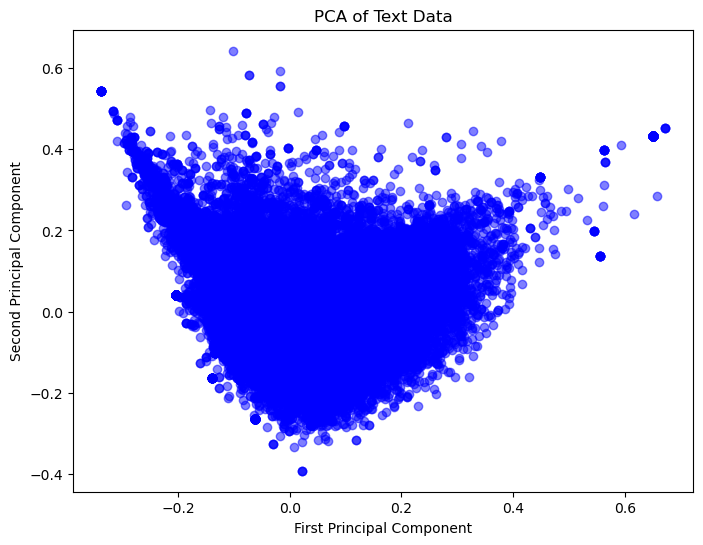

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Concatenate the text columns (replace 'text_column_name' with the actual column name)
train_text = twitter_training_df['text']
validation_text = twitter_validation_df['text']
youtube_text = youtube_spam_df['CONTENT']

# Concatenate all text data
all_text = pd.concat([train_text, validation_text, youtube_text], ignore_index=True)

# Step 1: Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features
X_tfidf = vectorizer.fit_transform(all_text)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_tfidf.toarray())

# Step 3: Plot the results of PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', marker='o', alpha=0.5)
plt.title('PCA of Text Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


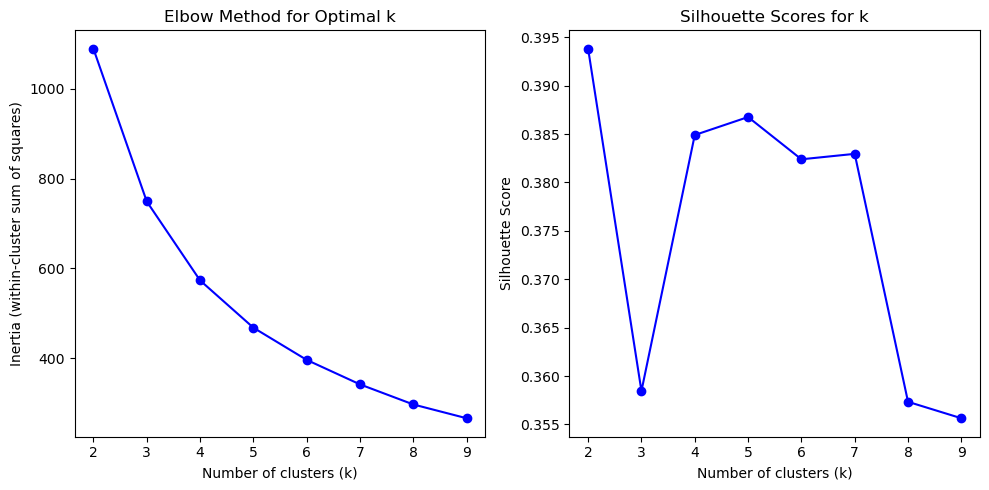

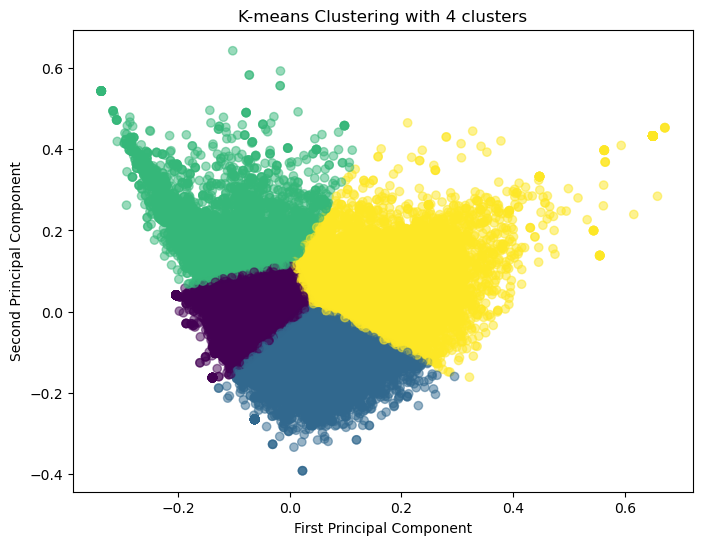

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []

range_clusters = range(2, 10)  # Trying from 2 to 9 clusters

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Step 2: Plot the Elbow Method to visualize the optimal number of clusters
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range_clusters, inertia, 'bo-', marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(range_clusters, silhouette_scores, 'bo-', marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for k')

plt.tight_layout()
plt.show()

# Step 3: Fit KMeans with the optimal number of clusters
optimal_k = 4  # Choose the k based on the elbow/silhouette score (adjust accordingly)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_pca)

# Get cluster labels
cluster_labels = kmeans.labels_

# Step 4: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5)
plt.title(f'K-means Clustering with {optimal_k} clusters')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


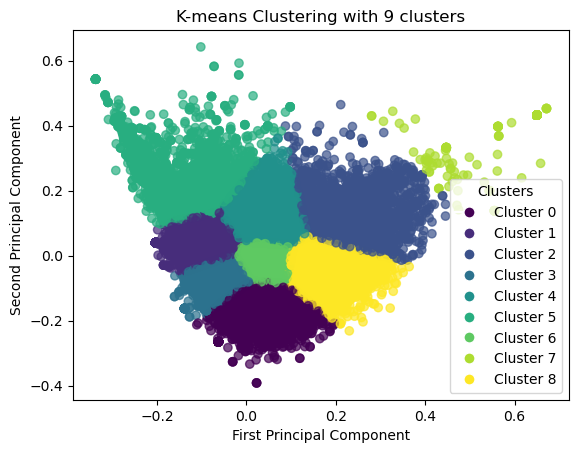

In [57]:
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.7)
plt.title('K-means Clustering with 9 clusters')

legend_labels = np.unique(cluster_labels)
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}', 
                      markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=8) for i in legend_labels]
plt.legend(handles=handles, title="Clusters", loc='best')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


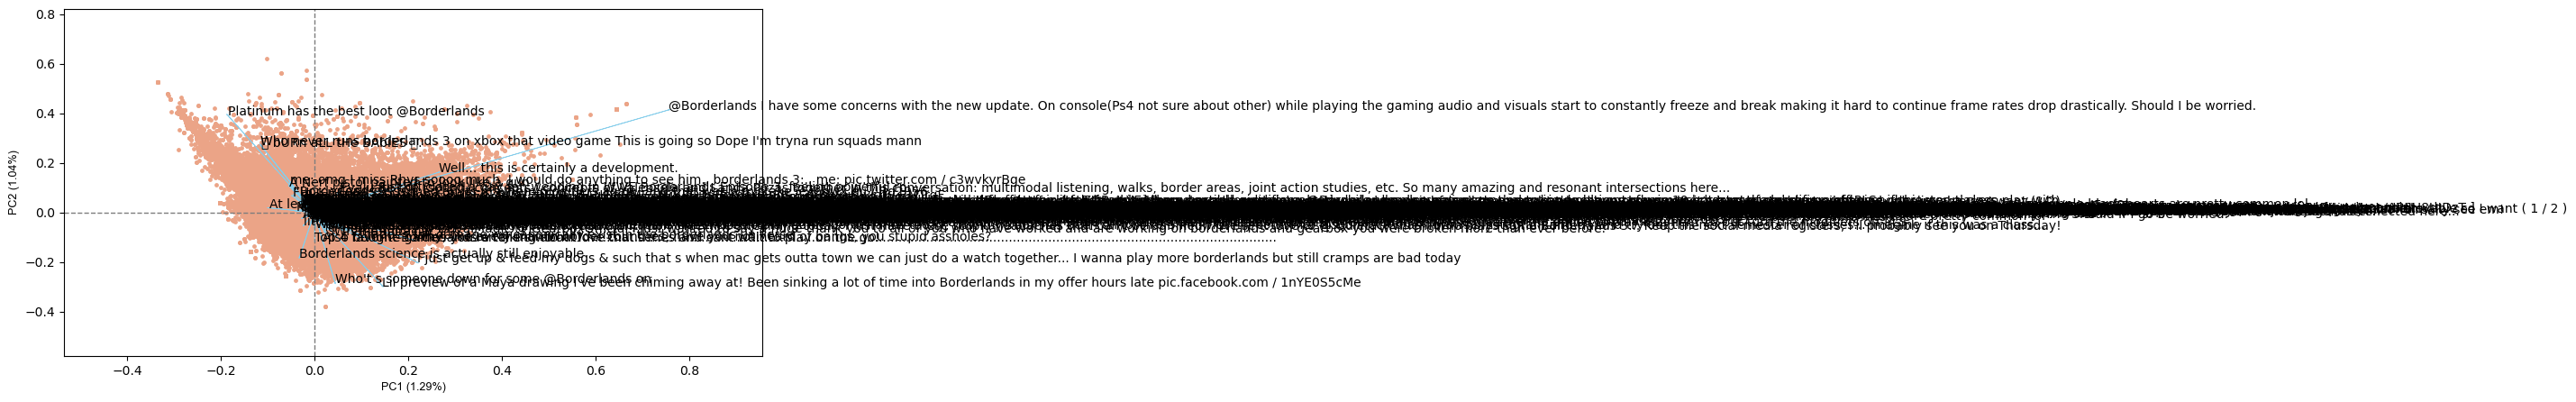

In [59]:
from bioinfokit.visuz import cluster
pca_scores=PCA().fit_transform(X_pca)
cluster.biplot(cscore=pca_scores, loadings=pca.components_, labels=all_text.values,
              var1=round(pca.explained_variance_ratio_[0]*100,2),
              var2=round(pca.explained_variance_ratio_[1]*100,2),show=True,
              dim=(10,5))